In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from collections import Counter

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


In [ ]:
df = pd.read_csv("/content/Myocardial infarction complications.csv")

In [ ]:
# ID is not useful for analysis
df.drop("ID", axis=1, inplace=True)

In [ ]:
missing_percentage = df.isnull().mean() * 100

# Setting the desired threshold for null values
threshold = 35  # Threshold of 35%

# Filter columns that exceed the threshold
columns_with_missing = missing_percentage[missing_percentage > threshold].index.tolist()

# Print column names, count, and percentage of null values
print("Column Name".ljust(20), "Missing Count".ljust(15), "Missing Percentage")
print("-" * 60)
for column in columns_with_missing:
    missing_count = df[column].isnull().sum()
    missing_percent = missing_percentage[column]
    print(f"{column.ljust(20)}{str(missing_count).ljust(15)}{missing_percent:.2f}%")


Column Name          Missing Count   Missing Percentage
------------------------------------------------------------
IBS_NASL            1628           95.76%
S_AD_KBRIG          1076           63.29%
D_AD_KBRIG          1076           63.29%
KFK_BLOOD           1696           99.76%
NA_KB               657            38.65%
NOT_NA_KB           686            40.35%
LID_KB              677            39.82%


In [ ]:
df = df.drop(columns = columns_with_missing)

In [ ]:

# List of binary and ordinal features (based on their data types)
binary_ordinal_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target variable if it's present in the list
binary_ordinal_features.remove('LET_IS')

# List of other features
other_features = df.columns.difference(binary_ordinal_features)

# Impute binary and ordinal features with mode
binary_ordinal_imputer = SimpleImputer(strategy='most_frequent')
df[binary_ordinal_features] = binary_ordinal_imputer.fit_transform(df[binary_ordinal_features])

# Impute other features with median
other_imputer = SimpleImputer(strategy='median')
df[other_features] = other_imputer.fit_transform(df[other_features])



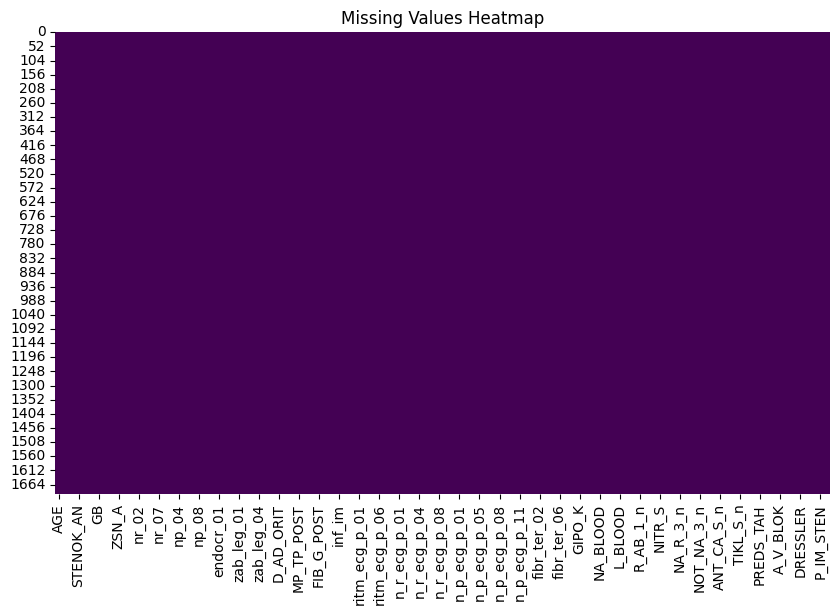

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

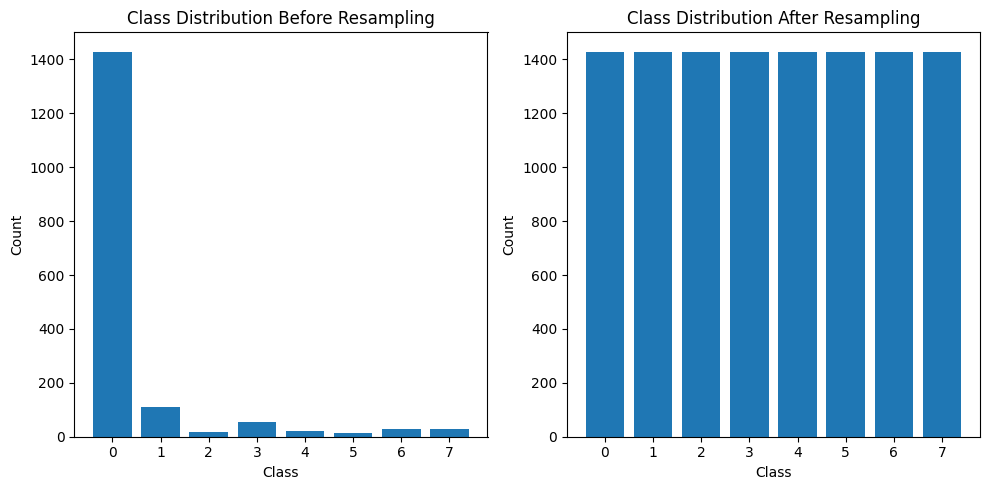

In [ ]:
# Define the target variable
target_column = 'LET_IS'

# Split the data into features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Count the class distribution before resampling
class_distribution_before = dict(Counter(y))

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Perform SMOTE resampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count the class distribution after resampling
class_distribution_after = dict(Counter(y_resampled))

# Plot the class distribution before and after resampling
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(class_distribution_before.keys(), class_distribution_before.values())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution Before Resampling')

plt.subplot(1, 2, 2)
plt.bar(class_distribution_after.keys(), class_distribution_after.values())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After Resampling')

plt.tight_layout()
plt.show()


In [ ]:
#Choosing best features

In [ ]:
# Define the target variable
target_column = 'LET_IS'

# Split the data into features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 5 important features
print("Top 5 important features:")
print(importance_df.head(5))

# Predict on the test data
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


Top 10 important features:
           Feature  Importance
110         RAZRIV    0.234124
35       K_SH_POST    0.132588
47   ritm_ecg_p_04    0.026268
37        SVT_POST    0.025366
25       endocr_02    0.020293
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       288
         1.0       0.79      0.48      0.59        23
         2.0       1.00      1.00      1.00         1
         3.0       1.00      1.00      1.00        11
         4.0       1.00      0.12      0.22         8
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         3
         7.0       1.00      0.25      0.40         4

    accuracy                           0.92       340
   macro avg       0.71      0.48      0.52       340
weighted avg       0.91      0.92      0.90       340



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
age = df['AGE']
let_is = df['LET_IS']

# Calculate the Pearson correlation coefficient
correlation_coefficient, _ = stats.pearsonr(age, let_is)
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.15760711744268455


In [ ]:
# Calculate the Pearson correlation coefficient
correlation_coefficient, _ = stats.pearsonr(df['SEX'], df['LET_IS'])

print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: -0.08632589281657291


In [ ]:
# Define the target variable
target_column = 'LET_IS'

# Define the features
selected_features = ['AGE','SEX','RAZRIV','K_SH_POST','ritm_ecg_p_04' ,'SVT_POST' ,'endocr_02']

# Split the data into features (X) and target (y)
X = df[selected_features]
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95       288
         1.0       0.82      0.39      0.53        23
         2.0       0.00      0.00      0.00         1
         3.0       1.00      1.00      1.00        11
         4.0       0.00      0.00      0.00         8
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         3
         7.0       0.00      0.00      0.00         4

    accuracy                           0.90       340
   macro avg       0.34      0.30      0.31       340
weighted avg       0.85      0.90      0.87       340



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Define the target variable
target_column = 'LET_IS'

# Define the features
selected_features = ['AGE','SEX','RAZRIV','K_SH_POST','ritm_ecg_p_04' ,'SVT_POST' ,'endocr_02']

# Split the data into features (X) and target (y)
X = df[selected_features]
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
model = SVC(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       288
         1.0       0.00      0.00      0.00        23
         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00        11
         4.0       0.00      0.00      0.00         8
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         3
         7.0       0.00      0.00      0.00         4

    accuracy                           0.85       340
   macro avg       0.11      0.12      0.11       340
weighted avg       0.72      0.85      0.78       340



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Define the target variable
target_column = 'LET_IS'

# Define the features
selected_features = ['AGE','SEX','RAZRIV','K_SH_POST','ritm_ecg_p_04' ,'SVT_POST' ,'endocr_02']
# Split the data into features (X) and target (y)
X = df[selected_features]
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95       288
         1.0       0.82      0.39      0.53        23
         2.0       0.00      0.00      0.00         1
         3.0       1.00      1.00      1.00        11
         4.0       0.00      0.00      0.00         8
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         3
         7.0       0.00      0.00      0.00         4

    accuracy                           0.90       340
   macro avg       0.34      0.30      0.31       340
weighted avg       0.85      0.90      0.87       340



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Fine tuning using Gridsearchcv for XGBOOST

In [ ]:
# Define the target variable
target_column = 'LET_IS'

# Split the data into features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_weighted', cv=3)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data
y_pred = best_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       288
         1.0       0.76      0.57      0.65        23
         2.0       0.50      1.00      0.67         1
         3.0       1.00      1.00      1.00        11
         4.0       1.00      0.12      0.22         8
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         3
         7.0       0.67      0.50      0.57         4

    accuracy                           0.92       340
   macro avg       0.61      0.52      0.51       340
weighted avg       0.91      0.92      0.90       340



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Define the target variable
target_column = 'LET_IS'

# Split the data into features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier with the best parameters
model = xgb.XGBClassifier(learning_rate=0.2, max_depth=3, n_estimators=300, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       288
         1.0       0.76      0.57      0.65        23
         2.0       0.50      1.00      0.67         1
         3.0       1.00      1.00      1.00        11
         4.0       1.00      0.12      0.22         8
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         3
         7.0       0.67      0.50      0.57         4

    accuracy                           0.92       340
   macro avg       0.61      0.52      0.51       340
weighted avg       0.91      0.92      0.90       340



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Evaluation Using cross validation method

In [ ]:
# Assuming X_train and y_train are your training data and labels
model = XGBClassifier(learning_rate=0.2, max_depth=3, n_estimators=300, random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", np.mean(scores))
print("Standard Deviation:", np.std(scores))


Cross-Validation Scores: [0.89705882 0.91176471 0.89705882 0.88970588 0.875     ]
Mean CV Score: 0.8941176470588236
Standard Deviation: 0.011947115300935238


-----------------------------Resampling and Model Selection and Evaluation Done.---------------------------------------------

In [ ]:
#Lets Try with different Evaluation metrics.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[284   2   1   0   0   0   0   1]
 [  9  13   0   0   0   0   1   0]
 [  0   0   1   0   0   0   0   0]
 [  0   0   0  11   0   0   0   0]
 [  7   0   0   0   1   0   0   0]
 [  1   1   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0]
 [  1   1   0   0   0   0   0   2]]


In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9176470588235294


In [ ]:
# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.9056629228354793
Recall: 0.9176470588235294
F1-Score: 0.9015838415186198


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.650295705836976


In [ ]:
from tabulate import tabulate

# Define the evaluation metrics
metrics = [
    ["Accuracy", 0.918],
    ["Precision", 0.906],
    ["Recall", 0.918],
    ["F1-Score", 0.902],
    ["Cohen's Kappa", 0.65]
]

# Tabulate the metrics
table = tabulate(metrics, headers=["Metric", "Value"], tablefmt="pretty")

print(table)


+---------------+-------+
|    Metric     | Value |
+---------------+-------+
|   Accuracy    | 0.918 |
|   Precision   | 0.906 |
|    Recall     | 0.918 |
|   F1-Score    | 0.902 |
| Cohen's Kappa | 0.65  |
+---------------+-------+


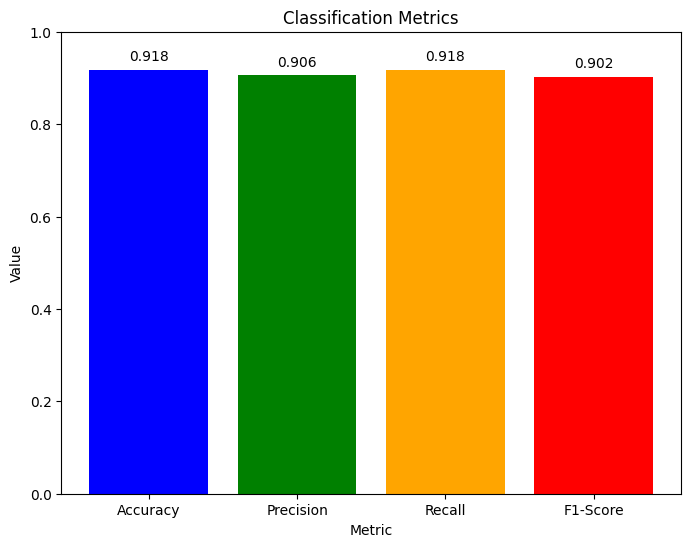

In [ ]:

# Metrics and their values
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values = [0.918, 0.906, 0.918, 0.902]

# Creating a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Classification Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ylim(0, 1)

for i, value in enumerate(values):
    plt.text(i, value + 0.02, f"{value:.3f}", ha='center')

plt.show()

## Completed Model Evaluation Techniques.